**Grupo 1:**
<br>Juana Mejía 
<br>Daniela Espinosa
<br>Pablo Ortega

## Inteligencia de negocios
### Laboratorio 1 - Regresión Lineal

In [28]:
import pandas as pd


In [34]:
data = pd.read_csv('202420_Laboratorio 1 - Regresión_train_data.csv')

In [30]:
data.shape

(1000, 23)

In [35]:
data['Duracion_KTAS_Min'] = data['Duracion_KTAS_Min'].str.replace(',', '.').astype(float)

### Descripción General de los Datos
Este conjunto de datos médicos contiene información sobre 1000 pacientes con 23 características tanto clínicas como demográficas, con el fin de estimar el tiempo aproximado de hospitalización de un paciente. A continuación, se describen las características de las variables, el perfil de los datos y el análisis de calidad de datos.

In [31]:
pd.set_option('display.max_columns', None)
data.head()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Queja_Principal,Estado_Mental,Dolor,dolor_NRS,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Diagnostico_En_Urgencias,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Duracion_KTAS_Min,Error_Triaje
0,2,2,49,2,1,ant. chest pain,1,1,2,150.0,90.0,92.0,20.0,36.2,98.0,2,Ischaemic chest pain,2,2,0,1591,"2,00",0
1,2,2,30,4,1,headache,1,1,4,140.0,80.0,76.0,20.0,36.3,99.0,3,"Subarachnoid haemorrhage, unspecified",7,3,0,211,"3,00",0
2,2,1,61,3,2,ant. chest pain,1,1,3,100.0,60.0,84.0,20.0,36.4,98.0,4,Contusion of front wall of thorax,1,4,0,119,"2,00",0
3,2,2,61,3,1,headache,1,1,4,120.0,70.0,76.0,20.0,36.5,99.0,4,Headache,1,3,4,414,"2,00",2
4,1,2,67,3,1,fever & chill,1,0,#BOÞ!,143.0,70.0,130.0,20.0,38.1,NaN,4,Fever,1,2,1,267,"3,60",2


### Estadísticas descriptivas

In [32]:
pd.set_option('display.max_columns', None)
data.describe()

,Grupo,Sexo,Edad,Modo_Llegada,Lesion,Estado_Mental,Dolor,SBP,DBP,HR,RR,BT,Saturacion,KTAS_enfermera,Disposicion,KTAS_experto,Grupo_De_Error,Duracion_Estancia_Min,Error_Triaje
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,983.000000,979.000000,988.000000,985.000000,989.000000,444.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.450000,1.514000,53.892000,2.811000,1.2000,1.103000,0.562000,133.485249,79.566905,84.400810,19.450761,36.562993,97.047297,3.328000,1.610000,3.260000,0.569000,12792.480000,0.253000
std,0.497743,0.500054,19.826483,0.796186,0.4002,0.431946,0.496389,27.156136,15.174593,16.297428,2.069882,0.519699,4.761112,0.862067,1.161572,0.865534,1.587375,87721.151446,0.630387
min,1.000000,1.000000,16.000000,1.000000,1.0000,1.000000,0.000000,50.000000,31.000000,32.000000,14.000000,35.000000,20.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,36.000000,2.000000,1.0000,1.000000,0.000000,114.000000,70.000000,73.000000,18.000000,36.200000,97.000000,3.000000,1.000000,3.000000,0.000000,132.750000,0.000000
50%,1.000000,2.000000,56.000000,3.000000,1.0000,1.000000,1.000000,130.000000,80.000000,82.000000,20.000000,36.500000,98.000000,3.000000,1.000000,3.000000,0.000000,270.500000,0.000000
75%,2.000000,2.000000,70.250000,3.000000,1.0000,1.000000,1.000000,150.000000,90.000000,96.000000,20.000000,36.800000,99.000000,4.000000,2.000000,4.000000,0.000000,620.000000,0.000000
max,2.000000,2.000000,94.000000,7.000000,2.0000,4.000000,1.000000,275.000000,160.000000,148.000000,30.000000,39.800000,100.000000,5.000000,7.000000,5.000000,9.000000,709510.000000,2.000000


### Resumen de las Variables

| Variable                  | Tipo                                     | Valores                 | Media     | Desviación Estándar | Rango                   | Número de Datos |
|---------------------------|------------------------------------------|-------------------------|-----------|---------------------|-------------------------|-----------------|
| Grupo                     | Categórica (1 o 2)                       | 1, 2                    | 1.45      | 0.50                | 1 a 2                   | 1000            |
| Sexo                      | Categórica (1=Hombre, 2=Mujer)           | 1, 2                    | 1.51      | 0.50                | 1 a 2                   | 1000            |
| Edad                      | Continua                                 | -                       | 53.89     | 19.83               | 16 a 94 años            | 1000            |
| Modo_Llegada              | Categórica con 7 niveles                 | 1 a 7                   | 2.81      | 0.80                | 1 a 7                   | 1000            |
| Lesion                    | Categórica binaria (1=Sí, 2=No)          | 1, 2                    | 1.20      | 0.40                | 1 a 2                   | 1000            |
| Queja_Principal           | Categórica (descripción textual)         | Variados*                | -         | -                   | -                       | 1000            |
| Estado_Mental             | Categórica ordinal (1 a 4)               | 1 a 4                   | 1.10      | 0.43                | 1 a 4                   | 1000            |
| Dolor                     | Categórica binaria (0=No, 1=Sí)          | 0, 1                    | 0.56      | 0.50                | 0 a 1                   | 1000            |
| dolor_NRS                 | Categórica ordinal (0 a 10)              | 0 a 10                  | 1.10      | 1.68                | 0 a 10                  | 1000            |
| SBP (Presión Sistólica)   | Continua                                 | -                       | 133.49    | 27.16               | 50 a 275 mmHg           | 983             |
| DBP (Presión Diastólica)  | Continua                                 | -                       | 79.57     | 15.17               | 31 a 160 mmHg           | 979             |
| HR (Frecuencia Cardíaca)  | Continua                                 | -                       | 84.40     | 16.30               | 32 a 148 lpm            | 988             |
| RR (Frecuencia Respiratoria) | Continua                             | -                       | 19.45     | 2.07                | 14 a 30 rpm             | 985             |
| BT (Temperatura Corporal) | Continua                                 | -                       | 36.56°C   | 0.52                | 35 a 39.8°C             | 989             |
| Saturacion                | Continua                                 | -                       | 97.05%    | 1.41                | 95 a 100%               | 444             |
| KTAS_enfermera            | Categórica ordinal (1 a 5)               | 1 a 5                   | 3.33      | 0.86                | 1 a 5                   | 1000            |
| Diagnostico_En_Urgencias  | Categórica (descripción textual)         | Variados*               | -         | -                   | -                       | 1000            |
| Disposicion               | Categórica con 7 niveles                 | 1 a 7                   | 3.33      | 1.16                | 1 a 7                   | 1000            |
| KTAS_experto              | Categórica ordinal (1 a 5)               | 1 a 5                   | 3.26      | 0.87                | 1 a 5                   | 1000            |
| Grupo_De_Error            | Categórica ordinal (0 a 5)               | 0 a 5                   | 0.57      | 1.59                | 0 a 9                   | 1000            |
| Duracion_Estancia_Min     | Continua                                 | -                       | 12792.48  | 87721.15            | 0 a 709510 minutos      | 1000            |
| Duracion_KTAS_Min         | Continua                                 | -                       | 2.00      | 1.20                | 1 a 7 minutos           | 1000            |
| Error_Triaje              | Categórica binaria (0=No, 1=Sí)          | 0, 1                    | 0.25      | 0.63                | 0 a 2                   | 1000            |

*Las variables Queja_Principal y Diagnostico_En_Urgencia tienen 347 y 489 categorías respectivamente


In [50]:
categoricas=['Grupo','Sexo','Modo_Llegada',"Lesion",'Queja_Principal','Estado_Mental','Dolor','dolor_NRS','KTAS_enfermera','Diagnostico_En_Urgencias','Disposicion','KTAS_experto','Grupo_De_Error','Error_Triaje']
data_categorica=data[categoricas]

levels = data_categorica.apply(pd.Series.unique)
num_levels = data_categorica.apply(pd.Series.nunique)

print(levels)
print(num_levels)

Grupo                                                                  [2, 1]
Sexo                                                                   [2, 1]
Modo_Llegada                                            [2, 4, 3, 1, 6, 5, 7]
Lesion                                                                 [1, 2]
Queja_Principal             [ant. chest pain, headache, fever & chill, dys...
Estado_Mental                                                    [1, 4, 2, 3]
Dolor                                                                  [1, 0]
dolor_NRS                              [2, 4, 3, #BOÞ!, 6, 5, 7, 8, 1, 9, 10]
KTAS_enfermera                                                [2, 3, 4, 1, 5]
Diagnostico_En_Urgencias    [Ischaemic chest pain, Subarachnoid haemorrhag...
Disposicion                                             [2, 7, 1, 5, 6, 3, 4]
KTAS_experto                                                  [2, 3, 4, 1, 5]
Grupo_De_Error                                 [0, 4, 1, 2, 6, 7

### Análisis de Calidad de Datos

##### Valores Faltantes
- **Saturacion**, **BT (Temperatura Corporal)** y **dolor_NRS**: Tienen valores faltantes.

##### Distribución de Datos
- **Duracion_Estancia_Min**: Muestra alta variabilidad, con algunos valores extremadamente altos que podrían ser atípicos.
- **BT (Temperatura Corporal)**: Tiene poca variabilidad y valores muy concentrados.

##### Valores Atípicos
- **Duracion_Estancia_Min**: Presenta valores extremos que pueden ser errores o casos excepcionales.
- **SBP (Presión Sistólica)** y **HR (Frecuencia Cardíaca)**: Muestran algunas discrepancias que deben ser evaluadas.

##### Consistencia de Datos
- **dolor_NRS**: Muestra un rango amplio (0 a 10) pero con una media baja, lo cual es consistente con el reporte de dolor.


### Preselección de Variables para el Modelado

Para estimar la **Duracion_Estancia_Min**, las siguientes variables son importantes:

- **Edad**: Influye en la duración de la hospitalización.
- **Estado_Mental**: Relacionado con la condición clínica.
- **SBP (Presión Sistólica)**, **DBP (Presión Diastólica)**, **HR (Frecuencia Cardíaca)**: Indicadores clave de la condición física.
- **KTAS_experto**: Evaluación de la urgencia por un experto.
- **Saturacion**: Estado de oxigenación.
- **Grupo**: Puede reflejar diferencias en el tratamiento.
- **Grupo_De_Error**: Posible influencia en la duración de la estancia.
- **Duracion_KTAS_Min**: Tiempo hasta la clasificación, que puede correlacionarse con la duración total.


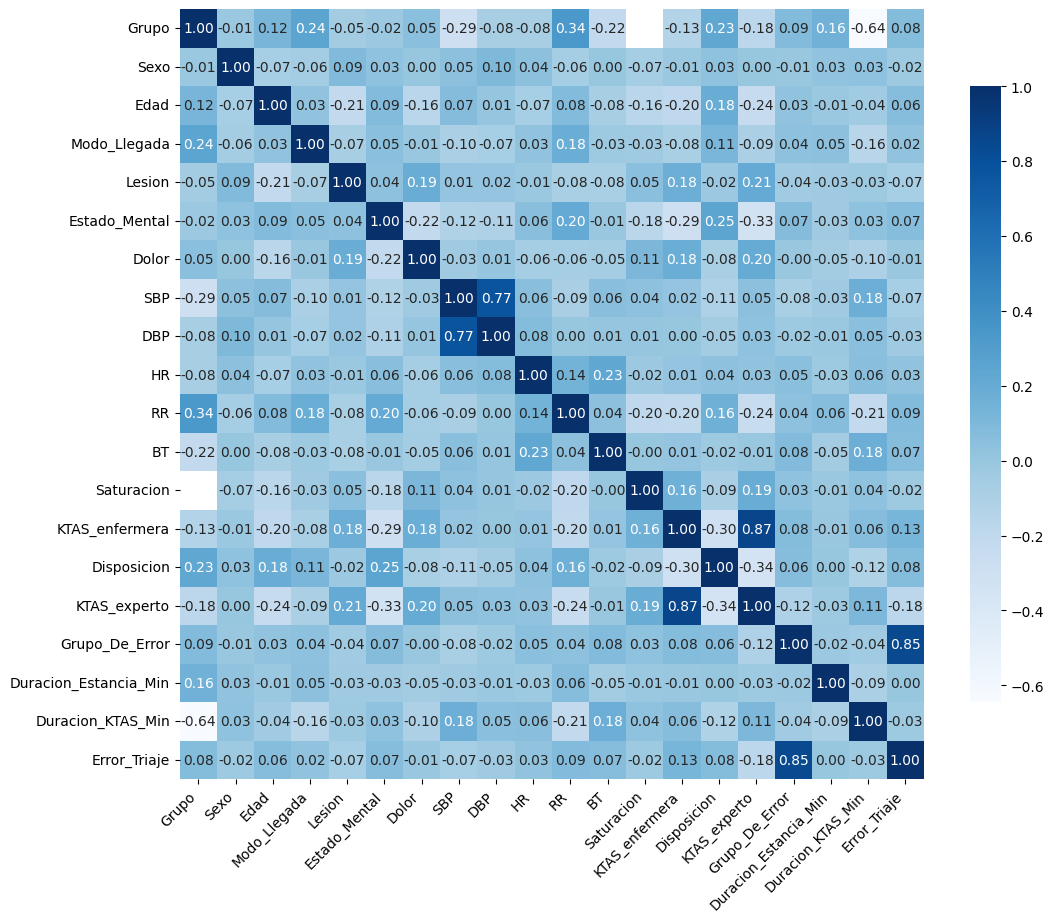

Index(['Grupo', 'Sexo', 'Edad', 'Modo_Llegada', 'Lesion', 'Queja_Principal',
       'Estado_Mental', 'Dolor', 'dolor_NRS', 'SBP', 'DBP', 'HR', 'RR', 'BT',
       'Saturacion', 'KTAS_enfermera', 'Diagnostico_En_Urgencias',
       'Disposicion', 'KTAS_experto', 'Grupo_De_Error',
       'Duracion_Estancia_Min', 'Duracion_KTAS_Min', 'Error_Triaje'],
      dtype='object')


In [36]:
import seaborn as sb
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = data.corr(numeric_only= True)

# Set up the figure size
plt.figure(figsize=(12, 10))

# Create the heatmap
sb.heatmap(corr, cmap="Blues", annot=True, annot_kws={"size": 10}, fmt=".2f", 
           cbar_kws={"shrink": 0.8})

# Rotate the x and y labels
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)

# Show the plot
plt.show()

print(data.columns)


En la matriz de correlación es posible identificar variables correlacionadas que podrían ser eliminadas ya que una explica a la otra. Las principales son:
- SBP con DBP
- KTAS_enfermera con KTAS_experto
- Grupo_De_Error con Error_Triaje

<Axes: >

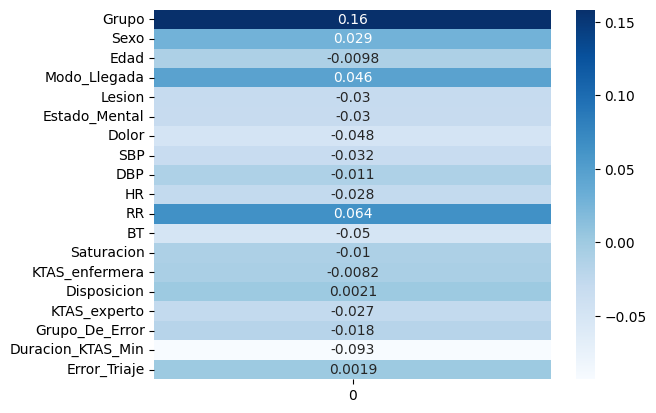

In [38]:
corrw = data.drop(['Duracion_Estancia_Min'], axis=1).corrwith(data['Duracion_Estancia_Min'], numeric_only= True)
sb.heatmap(pd.DataFrame(corrw), cmap="Blues", annot=True)

Information Gain

In [35]:
from sklearn.feature_selection import mutual_info_classif

excluded_columns=['Duracion_Estancia_Min','Queja_Principal','Diagnostico_En_Urgencias',]
#X=data.loc[:, ~data.columns.isin(excluded_columns)]
X=data.loc[:, data.columns == 'Edad']
Y=data.loc[:, data.columns == 'Duracion_Estancia_Min']

importances = mutual_info_classif(X, Y)

# Assuming 'dataframe' is the DataFrame containing your features
feat_importances = pd.Series(importances, data.columns[0:0])

feat_importances.plot(kind='barh', color='teal')
plt.show()


c:\Users\pablo\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Length of values (1) does not match length of index (0)